In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import stats
import matplotlib.backends.backend_pdf
import math
import random
from matplotlib import pyplot as plt 
import numpy as np  
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sys
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar
from pyecharts import options as opts
import dataframe_image as dfi
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#!{sys.executable} -m pip install dataframe_image
%matplotlib inline
sns.set()

In [4]:
#Load the dataset with the calculated differences Y[t], ommit the first value because difference is NaN and print the head()

# fileinput = str(input("Please enter the name of the .csv file you want to view: "))
def file(fileinput):
    if not ".csv" in fileinput:
        fileinput = "data/" + fileinput + ".csv"
    
    df = pd.read_csv(fileinput,skiprows=0)

    return df

In [5]:
def main():
    
    user_input = str(input("Please enter the name of the .csv file you want to view: "))

    df = file(user_input)
    
    df['difference'] = df.iloc[:,1].diff()
    df = df.iloc[1:]
    df.head()
    #Rename the columns
    df.columns = ['date', 'X[t]', 'Y[t]']
    df.head()

    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    df.head()

    #Plot the values X[t] and difference Y[t] on the same plot
    df.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Year', fontsize = 20)

    #Plot them on different plots to see trends more clearly
    #Specific trend in the values plot
    #Starts slightly higher and suddenly drops before spiking
    #There is a spike after 10 days___05/04/2014 - 14/04/2014
    #Huge spike at the end of observations
    #Values Plot
    df[['X[t]']].plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)



    #Differences Plot
    df[['Y[t]']].plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)

    #Trends and Seasonality in time-series with rolling means
    #Smoothed out seasonality and noise by trying hourly seasonality-24 hrs
    #Removed seasonality
    #There is a constant trend in the beginnign and then a spike at the end
    values = df[['X[t]']]
    values.rolling(24).mean().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)

    #Differences
    #Plotted differences to clearly see the points of trends on the graph
    #-------------------------------------------------------------------
    diff = df[['Y[t]']]
    diff.rolling(24).mean().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)

    #Removed noise and seasonality from differences
    #After plotting the differences we can see the points where the trend
    #drops or spikes and when (orange line)
    df_combined = pd.concat([values.rolling(24).mean(), diff.rolling(24).mean()], axis = 1)
    df_combined.plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)

    #Values X[t] differenced with diff() to note the spikes and drops of
    #the trend
    values.diff().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 20)

    #Plot the values X[t] and difference Y[t] on the same plot
    #Without smoothing
    #and their correlation coefficients
    #They are positively correlated
    df.plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Date', fontsize=20)
    df.corr()

    #Plot first order differencing of these time series and 
    # compute correlation of the seasonal components
    # Once removing the trends the correlation increases dynamically
    # They are highly correlated
    df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Date', fontsize=20)
    df.diff().corr()

    #This shows that the original time series do not repeat itself.
    # We see the trend starting with a spike and falling drastically
    #Drops again after 2500 observations and then comes up again
    fig, ax1 = plt.subplots(1)
    ax1 = pd.plotting.autocorrelation_plot(values)
    ax1.set_ylim([-0.5, 1.5])
    ax1.set_xlim([0, 20])

    fig, ax2 = plt.subplots(1)
    ax2 = pd.plotting.autocorrelation_plot(diff)
    ax2.set_xlim([0, 20])

    fig, ax3 = plt.subplots(1)
    ax3 = sns.distplot(diff, bins=100, kde=True, color='blue', hist_kws={"linewidth": 15,'alpha':1})
    ax3.set(xlabel='Normal Distribution', ylabel='Frequency')

    fig, ax4 = plt.subplots(1)
    ax4 = sns.distplot(values, bins=100, kde=True, color='blue', hist_kws={"linewidth": 15,'alpha':1})
    ax4.set(xlabel='Normal Distribution', ylabel='Frequency')
    
    pdf = matplotlib.backends.backend_pdf.PdfPages("time_series_analysis_{}.pdf".format(user_input))
    for fig in range(1, fig.number): ## will open an empty extra figure :(
        pdf.savefig(fig)
    pdf.close()
    return



Please enter the name of the .csv file you want to view: 4


C:\Users\odyss\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
C:\Users\odyss\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


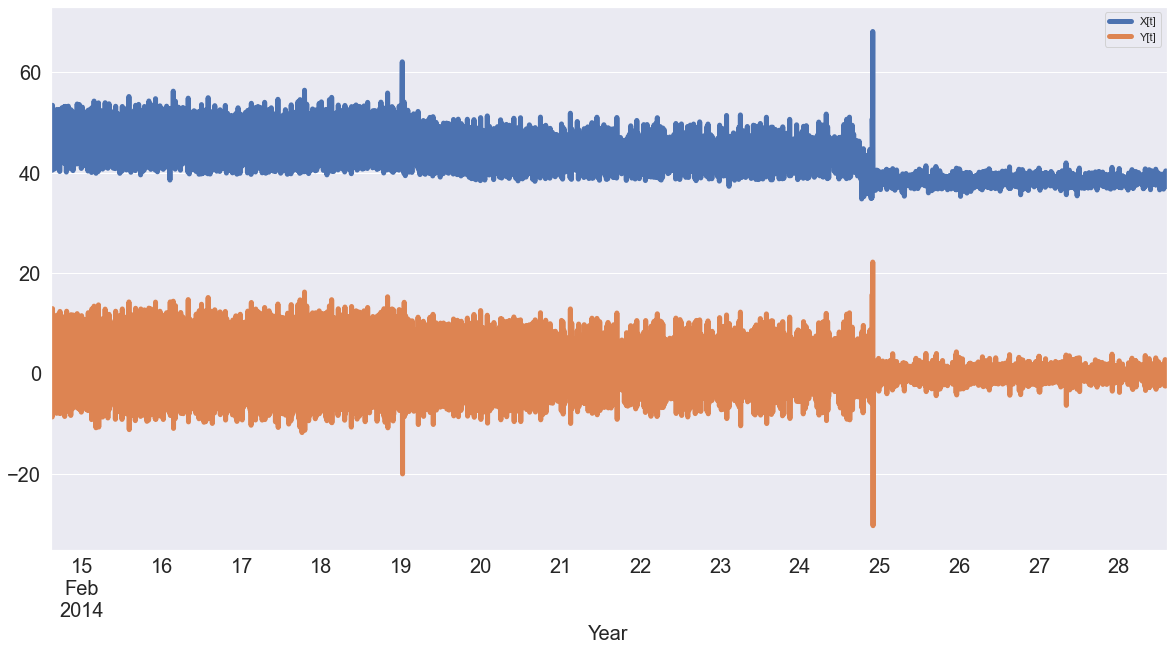

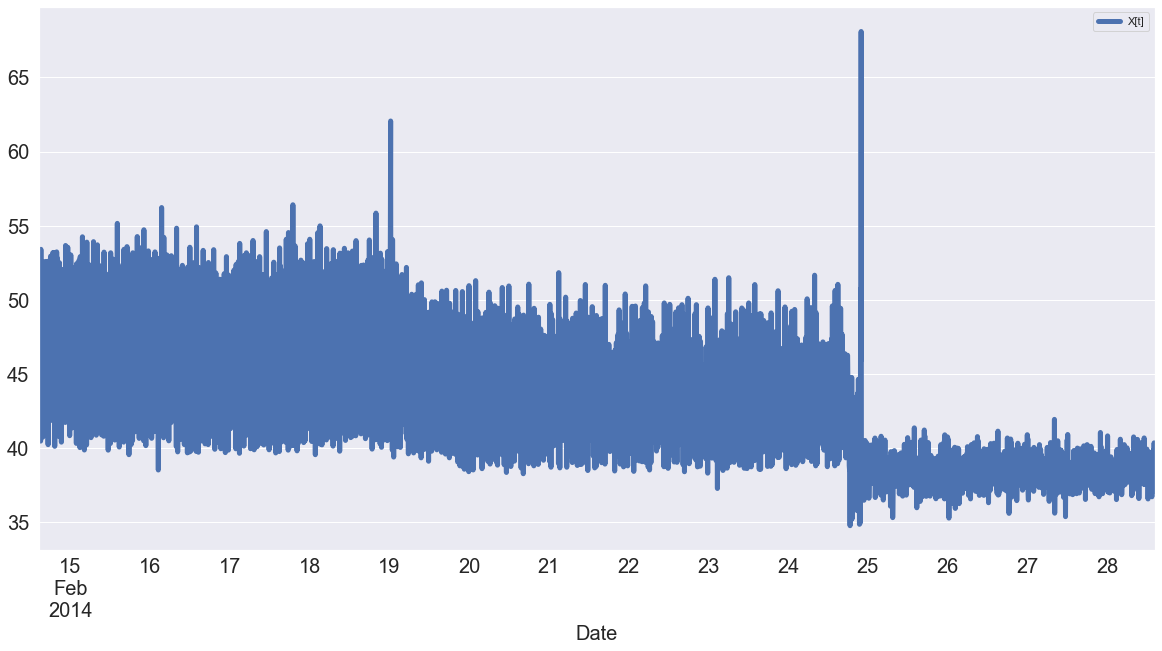

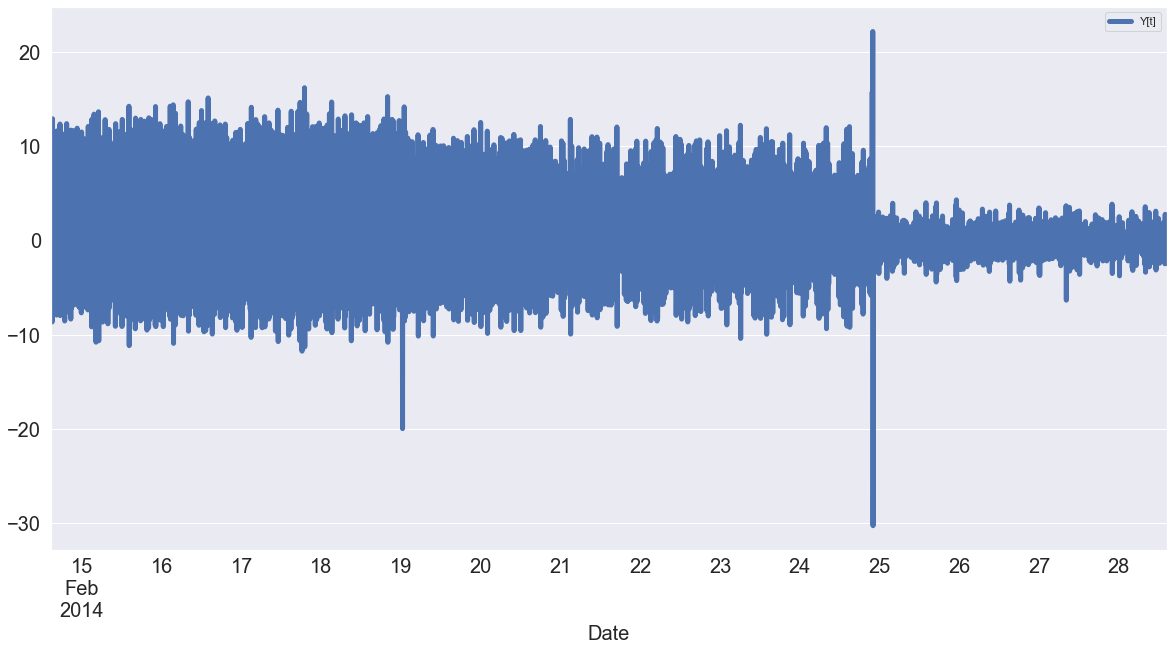

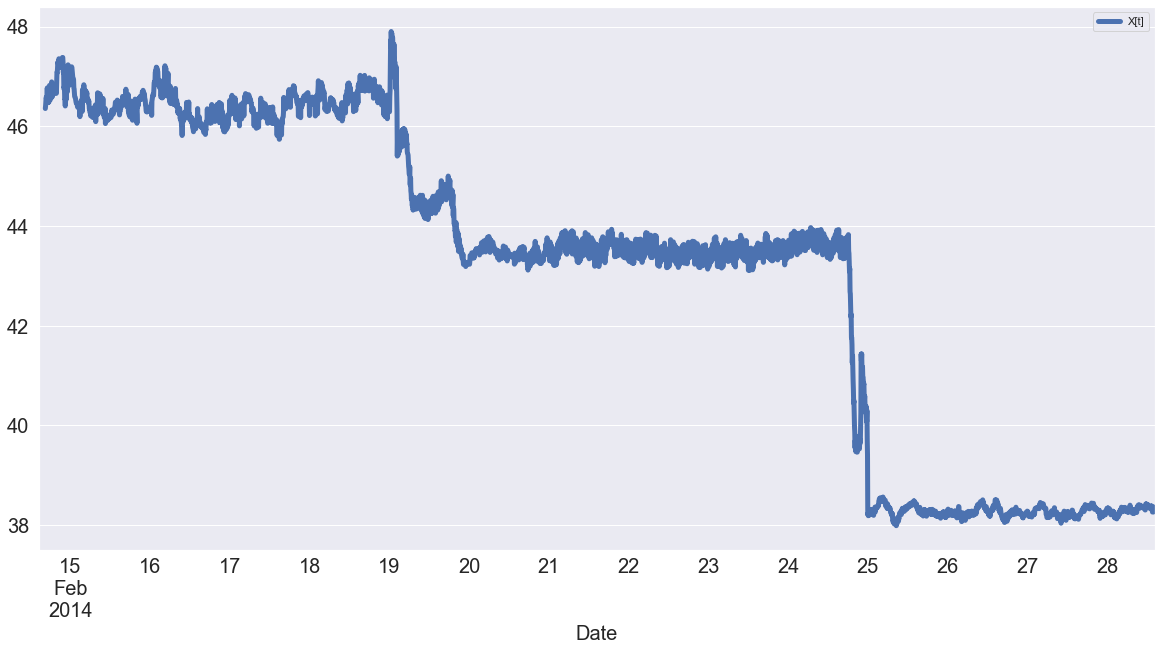

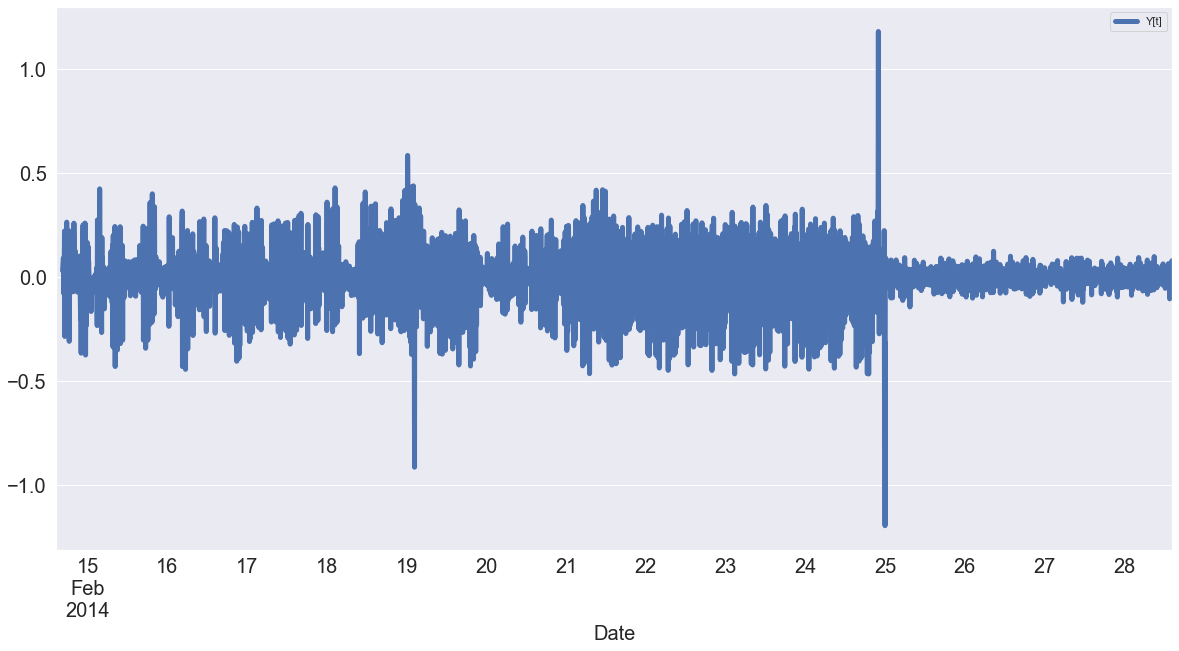

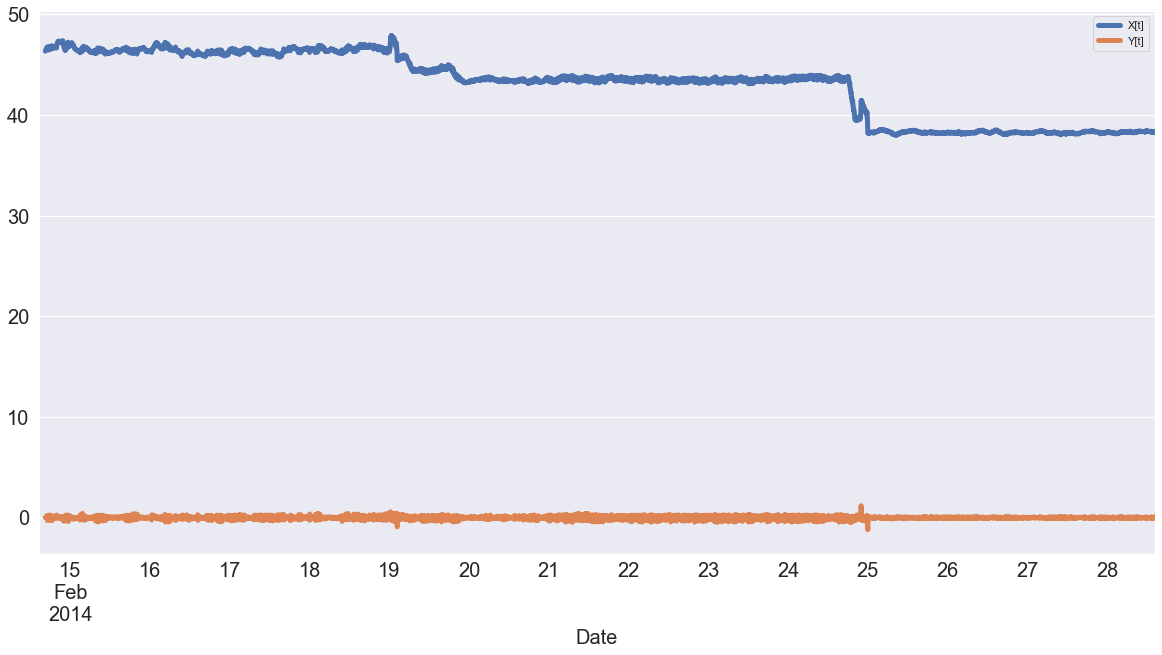

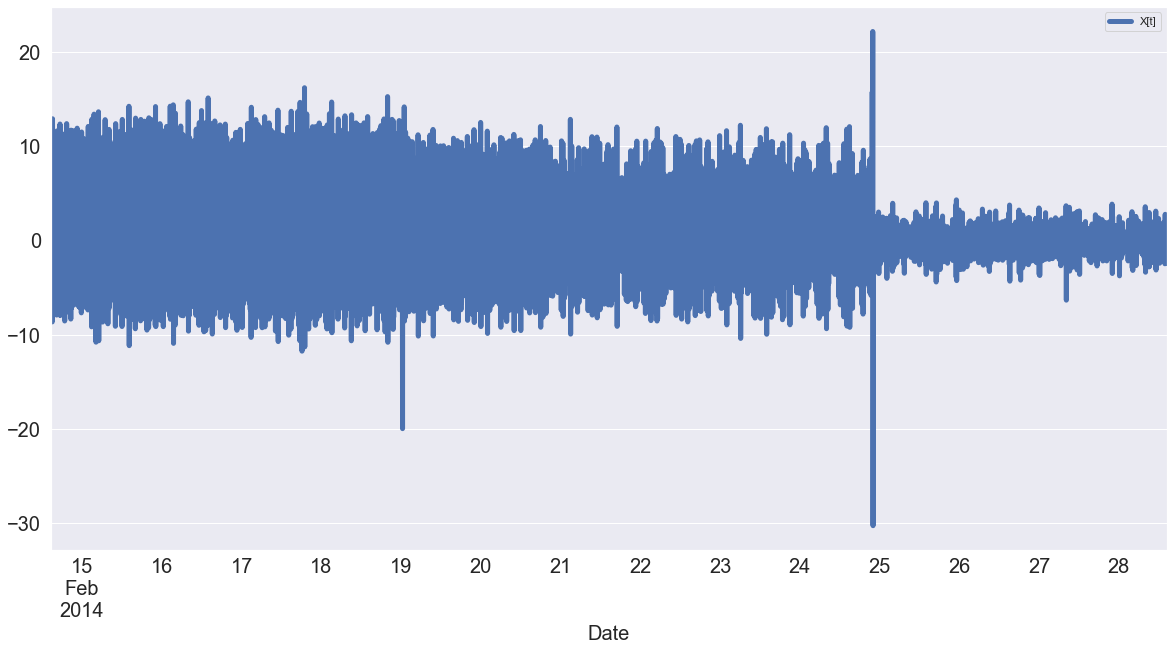

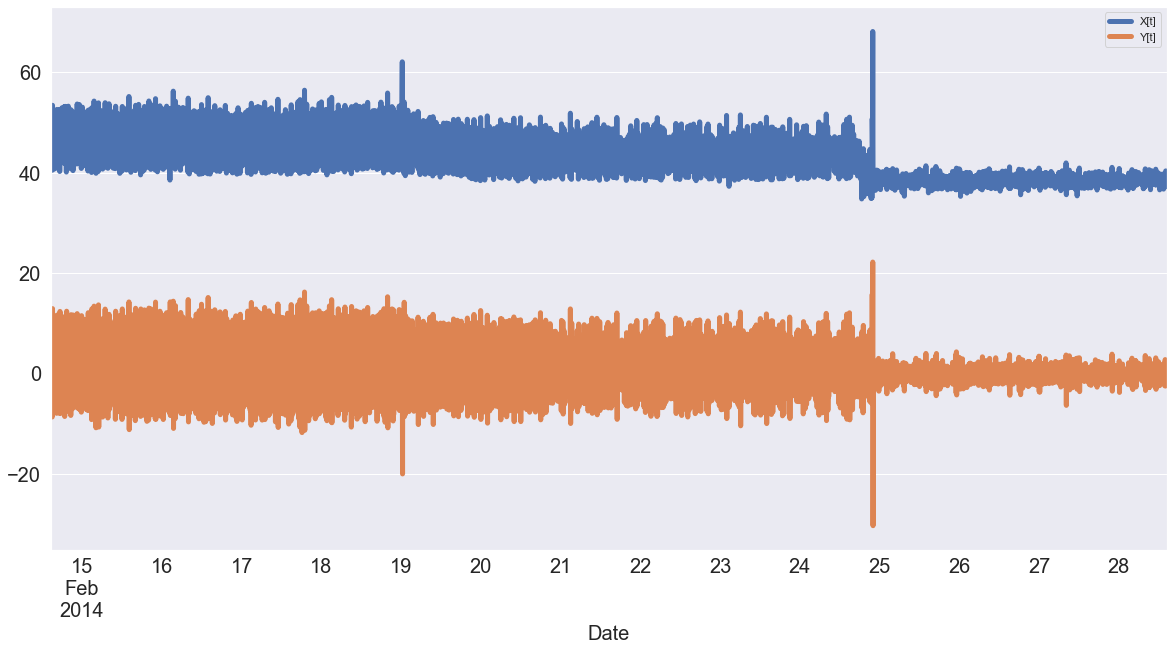

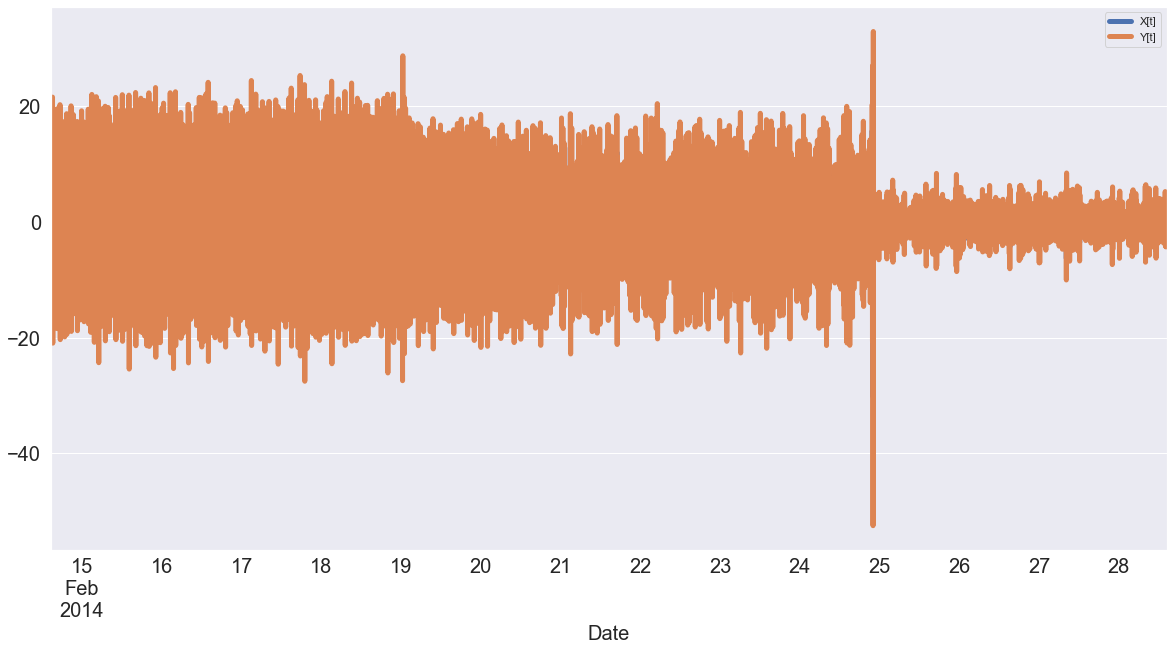

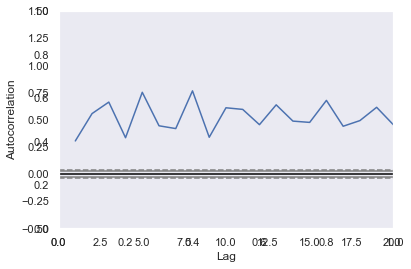

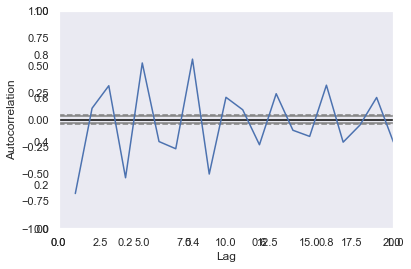

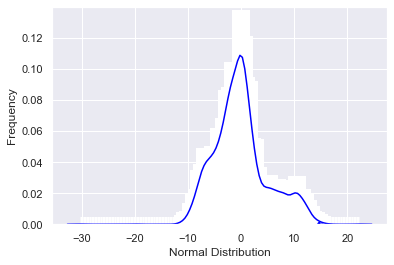

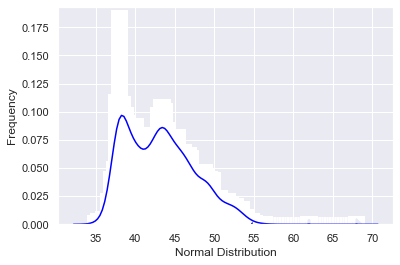

In [6]:
if __name__ == "__main__":
    main()